# 1.数据的批量读取

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
#tensorflow提供的数据集的读取方法
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [3]:
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


为什么要采用one-hot(读热码)编码？

1.将离散特征的取值扩展到欧式空间，离散特征的某个取值就对应欧式空间的某个点。

2.机器学习算法中，特征之间的距离的计算或相识度的常用计算方法都是基于欧式空间的。

3.将离散特征使用one-hot编码会让特征之间的距离计算更加合理。

In [4]:
print('训练集数量：',mnist.train.num_examples,'验证集数量：',mnist.validation.num_examples,
     '测试集数量：',mnist.test.num_examples)

训练集数量： 55000 验证集数量： 5000 测试集数量： 10000


In [5]:
print('train images shape:',mnist.train.images.shape,'labels shape:',mnist.train.labels.shape)

train images shape: (55000, 784) labels shape: (55000, 10)


In [6]:
#看具体一副image的数据
mnist.train.images[0]
# mnist.train.images[0].reshape(28,28)#一维数组转为矩阵（二维）*****reshape（）行优先，逐行排列

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [7]:
#可视化image
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
#     plt.imshow(image.reshape(14,56),cmap='binary')
    plt.show()

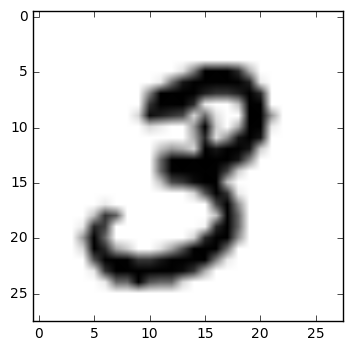

In [8]:
# plot_image(mnist.train.images[1])
plot_image(mnist.train.images[1])

In [9]:
mnist.train.labels[1]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [10]:
np.argmax(mnist.train.labels[1])#!!!!!!!!!!argmax返回的是最大数的索引

3

In [11]:
batch_images_xs,batch_labels_ys=mnist.train.next_batch(batch_size=10)#next_batch()实现内部会对数据集先做shuffle
print(mnist.train.labels[0:10])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


# 2.模型构建

In [12]:
#构建输入层
#定义待输入数据的占位符 
x=tf.placeholder(tf.float32,[None,784],name="X")
y=tf.placeholder(tf.float32,[None,10],name="Y")

In [13]:
#构建隐含层
H1NN=256
W1=tf.Variable(tf.random_normal([784,H1NN]),name='W1')
b1=tf.Variable(tf.zeros([H1NN]),name='b1')

Y1=tf.nn.relu(tf.matmul(x,W1)+b1 )

In [14]:
#构建输出层
W2=tf.Variable(tf.random_normal([H1NN,10]),name='W2')
b2=tf.Variable(tf.zeros([10]),name='b2')

forward=tf.matmul(Y1,W2)+b2 


In [15]:
#结果分类softmax将二分类延伸到多分类
pred=tf.nn.softmax(forward)

# 3.模型训练

In [16]:
train_epochs=40 #训练轮数
batch_size=50#单次训练样本的大小
total_batch=int(mnist.train.num_examples/batch_size)#每轮训练多少批次
learning_rate=0.01 #学习率
display_step=1#显示粒度

In [17]:
#定义交叉熵损失函数
# loss_function=tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))#结果出现nan
#tensorflow中提供了softmax_cross_entropy_with_logits函数，用于避免因为log(0)值为nan造成的数据不稳定。
loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=forward,labels=y))
#选择优化器
# optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

In [18]:
#定义准确率
correct_prediction=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))#得到一个bool值
#将bool值转化为浮点数，并计算平均值
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [19]:
#声明会话，初始化变量
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

In [20]:
#开始训练
from time import time
startTime=time()
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs,ys = mnist.train.next_batch(batch_size)#读取批次数据
        sess.run(optimizer,feed_dict={x:xs,y:ys})
        
    #使用验证集数据计算误差和准确率，验证集没有分批    
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x:mnist.validation.images,y:mnist.validation.labels})
    #打印训练过程中的详细信息
    if (epoch+1) % display_step ==0:
        print("Train epoch:",'%02d'%(epoch+1),'Loss=','{:.9f}'.format(loss),\
             'Accuracy=','{:.4f}'.format(acc))
        
CostTime=time()-startTime
print("Train Finished takes:",'{:.2f}'.format(CostTime))

Train epoch: 01 Loss= 1.546052217 Accuracy= 0.9344
Train epoch: 02 Loss= 0.941895008 Accuracy= 0.9426
Train epoch: 03 Loss= 0.650167406 Accuracy= 0.9516
Train epoch: 04 Loss= 0.542542398 Accuracy= 0.9572
Train epoch: 05 Loss= 0.383109272 Accuracy= 0.9644
Train epoch: 06 Loss= 0.407722414 Accuracy= 0.9610
Train epoch: 07 Loss= 0.415147275 Accuracy= 0.9608
Train epoch: 08 Loss= 0.371530503 Accuracy= 0.9594
Train epoch: 09 Loss= 0.374884695 Accuracy= 0.9622
Train epoch: 10 Loss= 0.401321769 Accuracy= 0.9668
Train epoch: 11 Loss= 0.406681716 Accuracy= 0.9648
Train epoch: 12 Loss= 0.412029386 Accuracy= 0.9656
Train epoch: 13 Loss= 0.411154240 Accuracy= 0.9664
Train epoch: 14 Loss= 0.450121880 Accuracy= 0.9656
Train epoch: 15 Loss= 0.429376721 Accuracy= 0.9650
Train epoch: 16 Loss= 0.595716894 Accuracy= 0.9632
Train epoch: 17 Loss= 0.480921000 Accuracy= 0.9724
Train epoch: 18 Loss= 0.447870404 Accuracy= 0.9686
Train epoch: 19 Loss= 0.608347535 Accuracy= 0.9674
Train epoch: 20 Loss= 0.4966424

# 4.模型评估与应用

In [21]:
#完成训练后，在测试集上评估模型的准确率
accu_test=sess.run(accuracy,
                        feed_dict={x:mnist.test.images,y:mnist.test.labels})
print("Test Accuracy:",accu_test)

Test Accuracy: 0.973


In [22]:
#由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字
prediction_result=sess.run(tf.argmax(pred,1),feed_dict={x:mnist.test.images})
prediction_result[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [23]:
#定义输出错误分类的函数
def print_predict_errs(labels,prediction):
    count=0
    compare_lists=(prediction==np.argmax(labels,1))
    err_lists=[i for i in range(len(compare_lists)) if compare_lists[i]==False]
    for x in err_lists:
        print('index='+str(x)+
             '标签值=',np.argmax(labels[x]),
             '预测值=',prediction[x])
        count+=1
    print('总计:'+str(count))

In [24]:
print_predict_errs(labels=mnist.test.labels,prediction=prediction_result)

index=8标签值= 5 预测值= 6
index=92标签值= 9 预测值= 4
index=115标签值= 4 预测值= 6
index=151标签值= 9 预测值= 8
index=247标签值= 4 预测值= 2
index=321标签值= 2 预测值= 7
index=340标签值= 5 预测值= 3
index=359标签值= 9 预测值= 8
index=362标签值= 2 预测值= 7
index=381标签值= 3 预测值= 7
index=444标签值= 2 预测值= 8
index=445标签值= 6 预测值= 0
index=448标签值= 9 预测值= 5
index=449标签值= 3 预测值= 5
index=479标签值= 9 预测值= 8
index=495标签值= 8 预测值= 0
index=551标签值= 7 预测值= 3
index=552标签值= 0 预测值= 9
index=571标签值= 4 预测值= 9
index=582标签值= 8 预测值= 2
index=583标签值= 2 预测值= 7
index=591标签值= 8 预测值= 2
index=610标签值= 4 预测值= 6
index=619标签值= 1 预测值= 8
index=629标签值= 2 预测值= 0
index=659标签值= 2 预测值= 3
index=674标签值= 5 预测值= 3
index=691标签值= 8 预测值= 4
index=720标签值= 5 预测值= 8
index=760标签值= 4 预测值= 9
index=829标签值= 4 预测值= 8
index=844标签值= 8 预测值= 7
index=883标签值= 3 预测值= 5
index=900标签值= 1 预测值= 3
index=924标签值= 2 预测值= 7
index=938标签值= 3 预测值= 5
index=947标签值= 8 预测值= 9
index=951标签值= 5 预测值= 4
index=956标签值= 1 预测值= 2
index=1014标签值= 6 预测值= 5
index=1039标签值= 7 预测值= 3
index=1044标签值= 6 预测值= 2
index=1112标签值= 4 预测值= 6
index=1156

In [25]:
#定义可视化函数
def plot_image_labels_prediction(images,#图像列表
                                labels,#标签列表
                                prediction,#预测值列表
                                index,#从第index个图像开始显示
                                num=10):#缺省一次显示10幅
    fig=plt.gcf()   #获取当前图标，Get Current Figure
    fig.set_size_inches(10,12)  #1英寸=2.54cm
    if num>25:
        num=25         #最多显示25个子图
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(np.reshape(images[index],(28,28)),cmap='binary' )#显示第index个图像
        title='label='+str(np.argmax(labels[index]))#构建该图上要显示的title信息
        if len(prediction)>0:
            title+=',predict'+str(prediction[index])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])#不显示坐标轴
        ax.set_yticks([])
        index+=1
    plt.show()
        

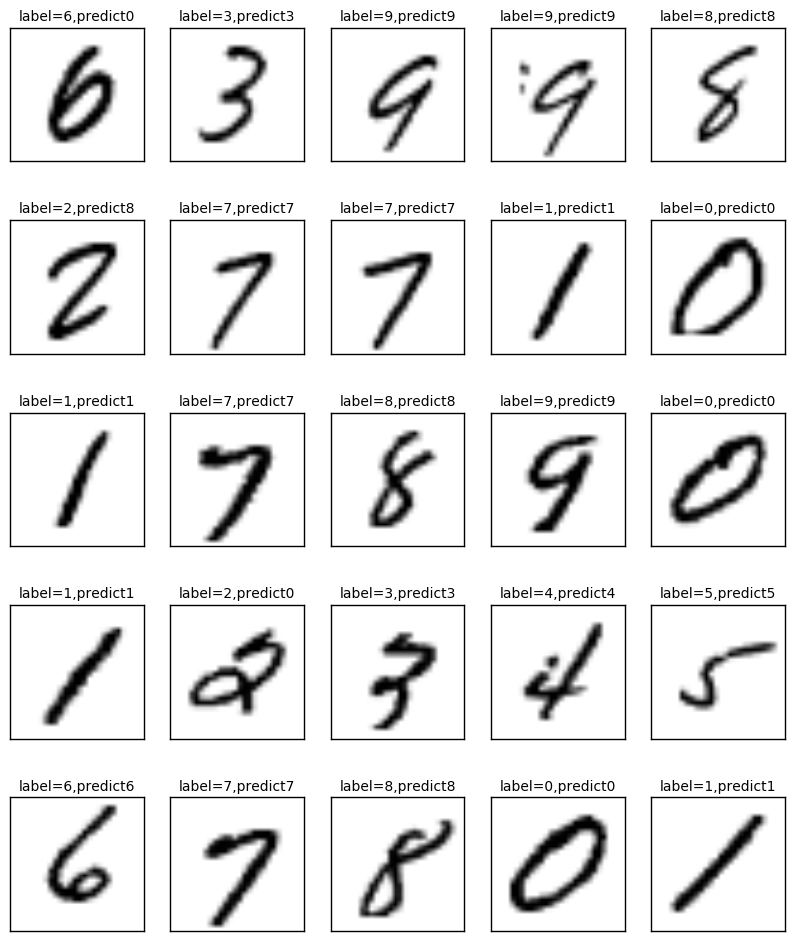

In [27]:
plot_image_labels_prediction(mnist.test.images,
                             mnist.test.labels,
                             prediction_result,
                                9888,
                                30)